# Recommender Systems 
> Jannach and Zanker book for detailed study 
> Content based and colloborative filtering 
> Colloborative filtering - amazon recommendations based on other peoples shopping experiences to you that you might need 
> Content based recommender - focus on the attribute of the items and gives recommendations based on the similarity between them 

> CF is more commonly used - easy to understand and implement - ability to learn on its own 
> CF
  - Memory based colloborative filtering 
  - Model based colloborative filtering 
  

In [11]:
# recommender systems for data set of movies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# column names 
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
# get the movie_title data 
df_movietitle = pd.read_csv('Movie_Id_Titles')

In [8]:
df_movietitle.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
# Interlink between user item id and movie item id 
df = pd.merge(df,df_movietitle,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [12]:
sns.set_style('whitegrid')

In [18]:
df.groupby(by='title')['rating'].mean().sort_values(ascending= False)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [19]:
df.groupby(by='title')['rating'].count().sort_values(ascending= False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [21]:
# Create a dataframe for ratings 
ratings = pd.DataFrame(data=df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
# adding a count of how many ppl rated so to have a better rating understanding 
ratings['no of ratings'] = pd.DataFrame(data=df.groupby('title')['rating'].count())
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


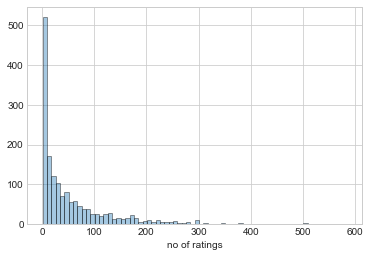

In [26]:
# Explore the data 
# ratings['no of ratings'].hist(bins=70)
sns.distplot(ratings['no of ratings'],bins=70,kde=False,hist_kws=dict(edgecolor='k',lw=1))


C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


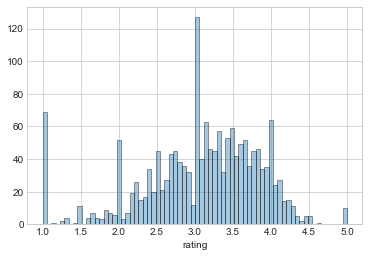

In [27]:
sns.distplot(ratings['rating'],bins=70,kde=False,hist_kws=dict(edgecolor='k',lw=1))

C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


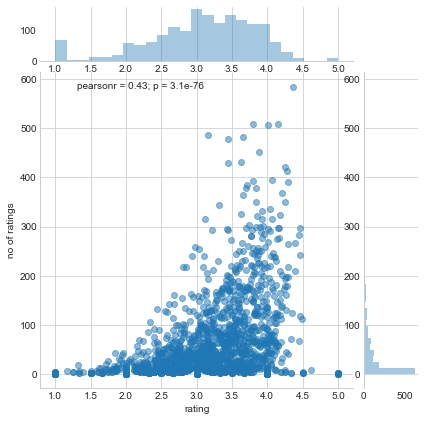

In [28]:
# joint plot 
sns.jointplot(x=ratings['rating'], y =ratings['no of ratings'],alpha=0.5)

# Recommender System Part 2

In [36]:
# Create a matrix of userid, title and rating 
print(df.head())
# moviemat = df.pivot_table
moviemat = df.pivot_table(values='rating', index='user_id', columns='title')


   user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)


In [37]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# using the rating dataframe 
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [39]:
ratings.sort_values('no of ratings',ascending=False).head()

,rating,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [40]:
# choosing star wars and Liar liar 
starwars_userratings = moviemat['Star Wars (1977)']
liarliar_userratings = moviemat['Liar Liar (1997)']

In [41]:
starwars_userratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [66]:
# corrwith keyword 
# try to establish a correlation of other movies similar to star war movies - based on the ratings
# use 2 DF's starwars_userratings, moviemat 

similar_to_starwars = moviemat.corrwith(starwars_userratings)
similar_to_starwars.head()

C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [43]:
similar_to_liarliar = moviemat.corrwith(liarliar_userratings)

C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
corr_starwars = pd.DataFrame(data=similar_to_starwars,columns=['Correlation'])

In [47]:
corr_starwars.head(20)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [48]:
corr_starwars.dropna(inplace=True)

In [49]:
corr_starwars.head(20)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [51]:
# get the similar movies by sorting the correlation df 
corr_starwars.sort_values(by='Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
# identify correlated movie to starwar based on the number of ratings 
corr_starwars = corr_starwars.join(ratings['no of ratings'])



In [67]:
# filtering based on more ratings and correlation to star wars 

boolcorr_starwars = corr_starwars['no of ratings'] >= 100
corr_starwars[boolcorr_starwars].sort_values(by='Correlation',ascending=False).head()

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [70]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])


In [71]:
corr_liarliar.dropna(inplace=True)   # dropping null values 

In [72]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [73]:
# combine the no of ratings df 
corr_liarliar = corr_liarliar.join(ratings['no of ratings'])
corr_liarliar.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [75]:
corr_liarliar[corr_liarliar['no of ratings'] >= 100].head()

,Correlation,no of ratings
title,,
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
2001: A Space Odyssey (1968),-0.057864,259
Absolute Power (1997),0.240303,127
"Abyss, The (1989)",0.245412,151


In [77]:
corr_liarliar[corr_liarliar['no of ratings'] >= 100].sort_values(by='Correlation', ascending=False).head()

,Correlation,no of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [ ]:
# Created a recommendation system which recommends similar movies to Star wars and Liar liar 
# based on the correlation 
